**Train SVM Model**

1. import Python packages and training data

In [1]:
# adding required libraries
import pandas as pd
import numpy as np

2. Load the datasets for model training

In [2]:
# Load the data from csv
x_data_org =pd.read_csv('../data/interim/x_data_org.csv')
y_data_org =pd.read_csv('../data/interim/y_data_org.csv')
x_data_eda =pd.read_csv('../data/interim/x_data.csv')
y_data_eda =pd.read_csv('../data/interim/y_data.csv')
x_balanced_data =pd.read_csv('../data/interim/x_balanced_data.csv')
y_balanced_data =pd.read_csv('../data/interim/y_balanced_data.csv')

x_test_org =pd.read_csv('../data/interim/x_test_org.csv')
y_test_org =pd.read_csv('../data/interim/y_test_org.csv')
x_test_eda =pd.read_csv('../data/interim/x_test.csv')
y_test_eda =pd.read_csv('../data/interim/y_test.csv')
x_balanced_test =pd.read_csv('../data/interim/x_balanced_test.csv')
y_balanced_test =pd.read_csv('../data/interim/y_balanced_test.csv')


3. Set up baseline model

In [3]:
# find the most occuring value and use it as base model
y_mode = y_data_org.mode()
y_shape = (len(x_data_org), 1)
y_base = np.full(y_shape, y_mode)

In [4]:
# calculate the accuracy score of the base model
from sklearn.metrics import accuracy_score
accuracy_score(y_data_org, y_base)

0.833125

4. Train SVC model

In [5]:
from sklearn.svm import SVC
datasets = [(x_data_org, y_data_org, x_test_org, y_test_org), (x_data_eda, y_data_eda, x_test_eda, y_test_eda), (x_balanced_data, y_balanced_data, x_balanced_test, y_balanced_test)]
models = []

for i, (x, y, x_test, y_test) in enumerate(datasets):
    svc_model = SVC()
    svc_model.fit(x, y.values.ravel())
    models.append(svc_model)
    print(f'Training score for dataset {i+1}: {svc_model.score(x, y)}')
    print(f'Test score for dataset {i+1}: {svc_model.score(x_test, y_test)}')


# Accessing the models
svc_model_org = models[0]
svc_model_over = models[1]
svc_model_under = models[2]

Training score for dataset 1: 0.833125
Test score for dataset 1: 0.835625
Training score for dataset 2: 0.8448700410396717
Test score for dataset 2: 0.8413566739606126
Training score for dataset 3: 0.6338893766461808
Test score for dataset 3: 0.6280701754385964


5. Exam the model

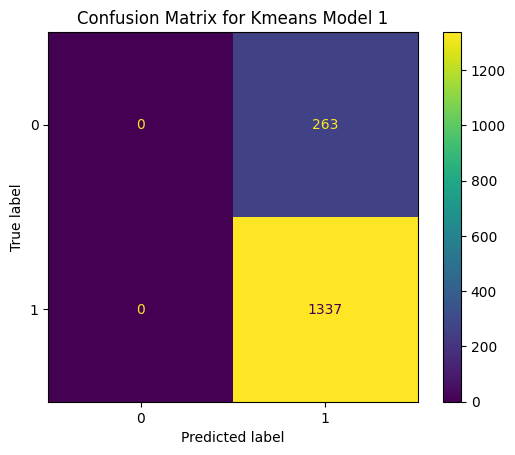

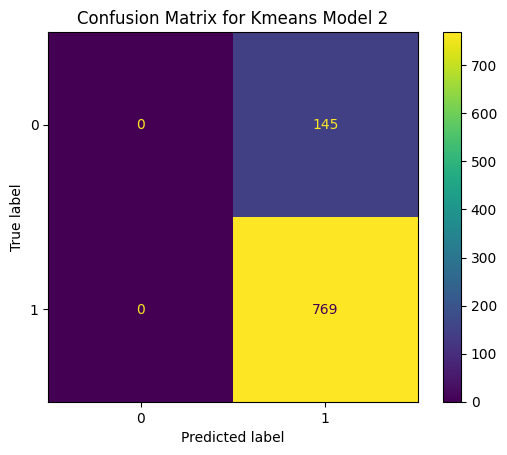

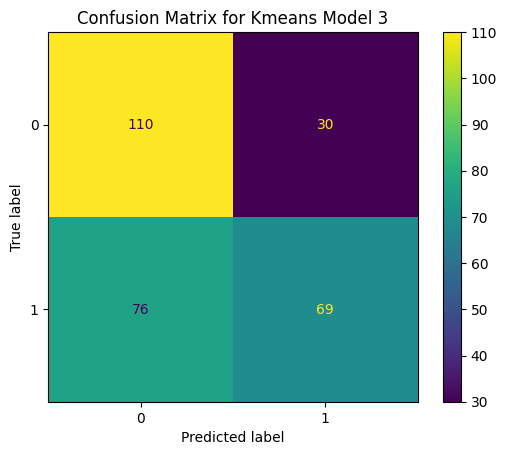

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate each model using ConfusionMatrixDisplay
for i, (x, y, x_test, y_test) in enumerate(datasets):
    model = models[i]
    y_pred = model.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f'Confusion Matrix for Kmeans Model {i+1}')
    plt.show()

6. Conclusion
From the EDA and the model training result, SVM may not be the ideal algorithm for this case.